In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing, svm
from sklearn.preprocessing import LabelEncoder
from collections import Counter
lbl = LabelEncoder()
from google.colab import drive
drive.mount('/content/drive')
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error

df1=pd.read_csv(r"/content/drive/MyDrive/netflix_titles.csv")
df2=pd.read_csv(r"/content/drive/MyDrive/disney_plus_titles.csv")
df3=pd.read_csv(r"/content/drive/MyDrive/imdb_top_1000.csv")
df4=pd.read_csv(r"/content/drive/MyDrive/movies.csv")
df5=pd.read_csv(r"/content/drive/MyDrive/HighestGrossers.csv")


Mounted at /content/drive


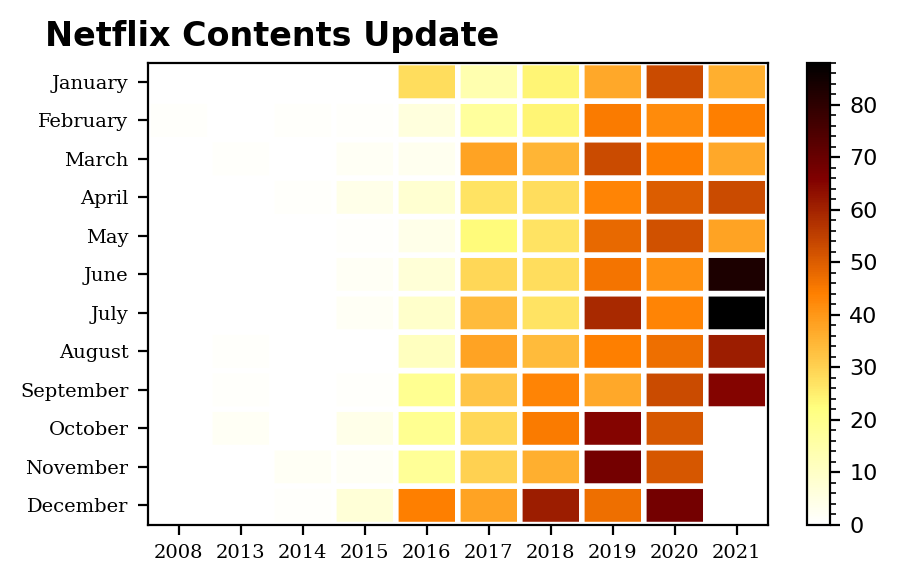

In [4]:
netflix_overall=df1
netflix_shows=netflix_overall[netflix_overall['type']=='TV Show']
netflix_date = netflix_shows[['date_added']].dropna()
netflix_date['year'] = netflix_date['date_added'].apply(lambda x : x.split(', ')[-1])
netflix_date['month'] = netflix_date['date_added'].apply(lambda x : x.lstrip().split(' ')[0])

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]
df = netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T
plt.figure(figsize=(5, 3), dpi=200)
plt.pcolor(df, cmap='afmhot_r', edgecolors='white', linewidths=2) # heatmap
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns, fontsize=7, fontfamily='serif')
plt.yticks(np.arange(0.5, len(df.index), 1), df.index, fontsize=7, fontfamily='serif')

plt.title('Netflix Contents Update', fontsize=12, fontfamily='Sans', fontweight='bold', position=(0.20, 1.0+0.02))
cbar = plt.colorbar()

cbar.ax.tick_params(labelsize=8)
cbar.ax.minorticks_on()
plt.show()

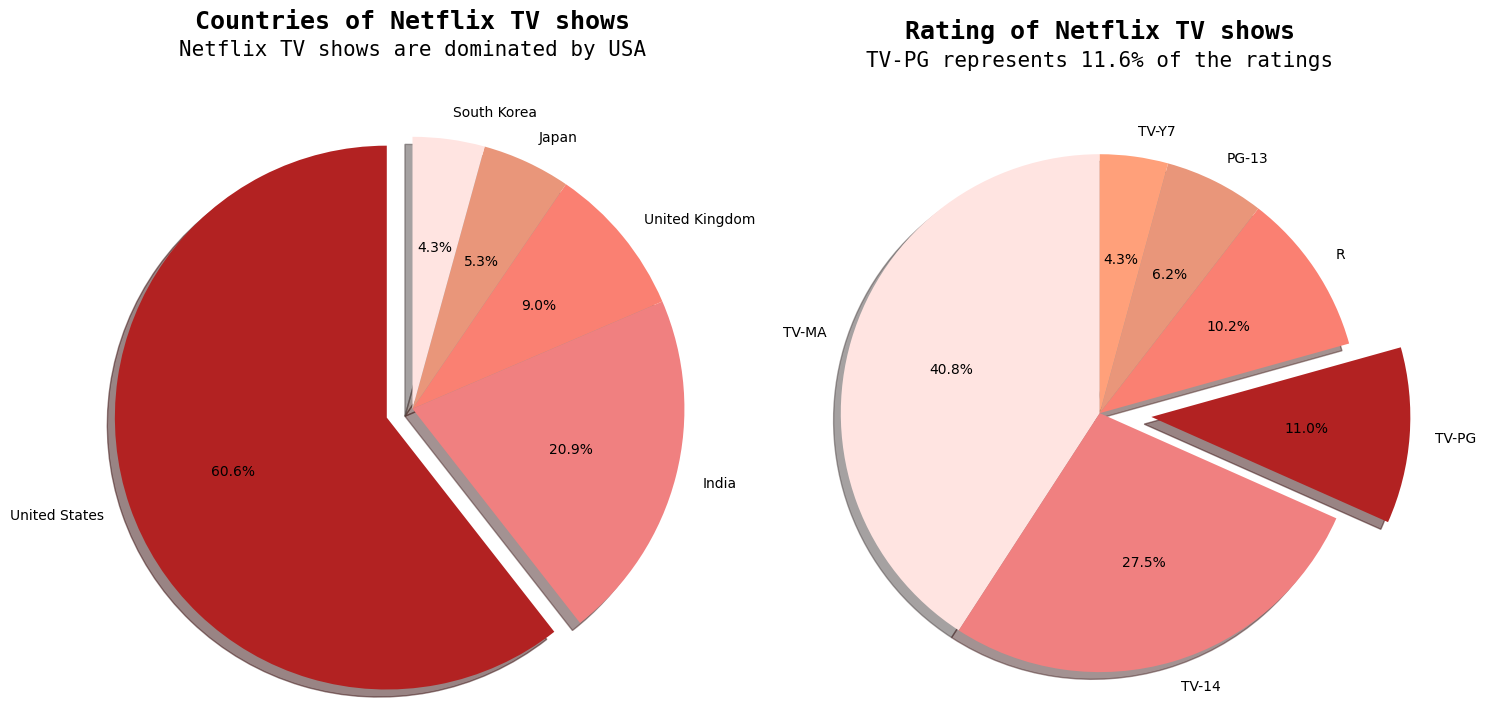

In [5]:
netflix=df1
country=netflix.country.value_counts()[:5].reset_index()
country.columns=['countries','count']
rating=netflix.rating.value_counts()[:6].reset_index()
rating.columns=['ratings','count']

fig=plt.figure(figsize=(15,7),facecolor='white')
gs=fig.add_gridspec(1,2)

ax0=fig.add_subplot(gs[0,0])
ax1=fig.add_subplot(gs[0,1])

colormap1=['firebrick','LightCoral','Salmon','DarkSalmon','mistyrose']
colormap2=['mistyrose','LightCoral','firebrick','Salmon','DarkSalmon','LightSalmon']

ax0.text(-0,1.4,"Countries of Netflix TV shows",fontsize=18,fontweight='bold', fontfamily='monospace',ha='center')
ax0.text(-0,1.3,"Netflix TV shows are dominated by USA",fontsize=15,fontweight='light', fontfamily='monospace',ha='center')
ax1.text(-0,1.45,"Rating of Netflix TV shows",fontsize=18,fontweight='bold', fontfamily='monospace',ha='center')
ax1.text(-0,1.34,"TV-PG represents 11.6% of the ratings",fontsize=15,fontweight='light', fontfamily='monospace',ha='center')

ax0.pie(country['count'], explode=[0.1,0,0,0,0],labels=country.countries, autopct='%1.1f%%',
        shadow=True, startangle=90,colors=colormap1)

ax1.pie(rating['count'], explode=[0,0,0.2,0,0,0],labels=rating.ratings, autopct='%1.1f%%',
        shadow=True, startangle=90,colors=colormap2)

ax0.axis('equal')
ax1.axis('equal')
plt.tight_layout()
plt.show()

In [6]:
df1.groupby("country").size().sort_values(ascending=False).nlargest(10).index
top10_contry_of_cnt_content = df1.groupby('country').size().sort_values(ascending=False).nlargest(5).index.tolist()
df_6 = df1.loc[df1['country'].isin(top10_contry_of_cnt_content)]
df_6_upd = df_6.groupby("release_year")['country'].value_counts().reset_index(name='counts')
fig = px.line(df_6_upd, x="release_year", y="counts", color='country',
              title='Dynamics of adding content for the top 5 countries by addition (excluding international projects)',
             markers=True)
fig.update_layout(xaxis_title="Year",
                  yaxis_title="Number of content",
                  legend_title='Country')

fig.show()

In [10]:
df_tv_show = df1.loc[df1['type'] == 'TV Show']

df_7 = pd.DataFrame(data=df_tv_show.groupby('duration').size().reset_index())
df_7.rename(columns={0: 'Number of TV Show'}, inplace=True)

fig = px.pie(df_7, values='Number of TV Show', names='duration',
             color_discrete_sequence=px.colors.sequential.RdBu, title='TV shows duration in Netflix')

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

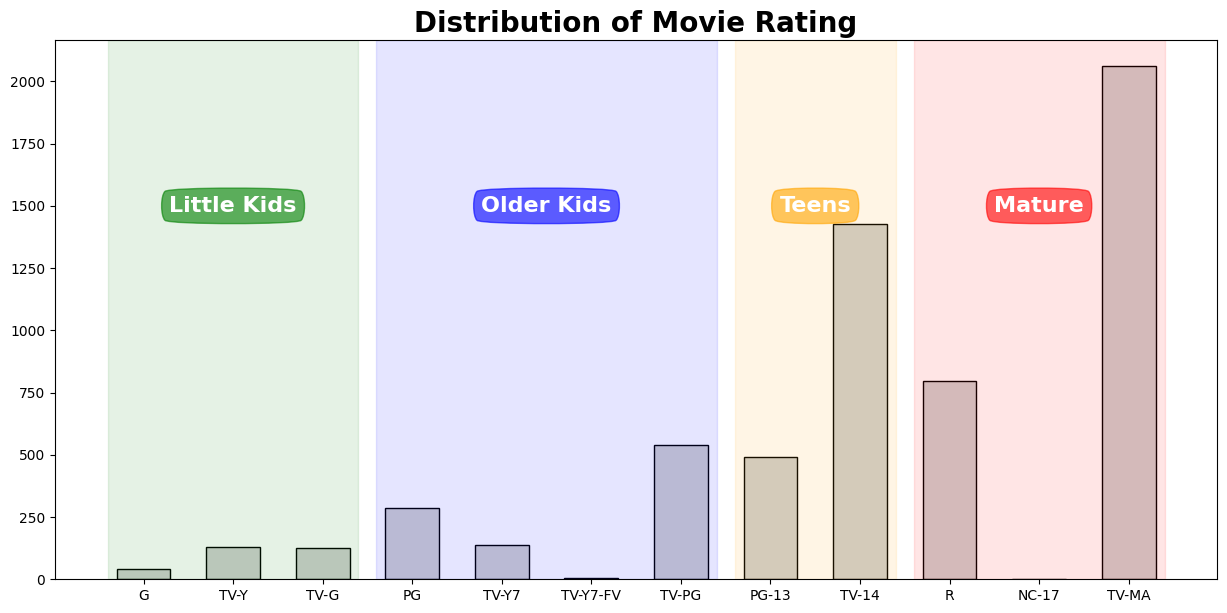

In [11]:
df_tv = df1[df1["type"] == "TV Show"]
df_movies = df1[df1["type"] == "Movie"]
rating_order_movie =  ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']
rating_order_tv =  [ 'TV-Y', 'TV-G', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'TV-14', 'R', 'TV-MA']
movie_rating = df_movies['rating'].value_counts()[rating_order_movie]
tv_rating = df_tv['rating'].value_counts()[rating_order_tv].fillna(0)
def rating_barplot(data, title, height, h_lim=None):
    fig, ax = plt.subplots(1,1, figsize=(15, 7))
    if h_lim :
        ax.set_ylim(0, h_lim)
    ax.bar(data.index, data,  color="#d0d0d0", width=0.6, edgecolor='black')

    color =  ['green',  'blue',  'orange',  'red']
    span_range = [[0, 2], [3,  6], [7, 8], [9, 11]]

    for idx, sub_title in enumerate(['Little Kids', 'Older Kids', 'Teens', 'Mature']):
        ax.annotate(sub_title,
                    xy=(sum(span_range[idx])/2 ,height),
                    xytext=(0,0), textcoords='offset points',
                    va="center", ha="center",
                    color="w", fontsize=16, fontweight='bold',
                    bbox=dict(boxstyle='round4', pad=0.4, color=color[idx], alpha=0.6))
        ax.axvspan(span_range[idx][0]-0.4,span_range[idx][1]+0.4,  color=color[idx], alpha=0.1)

    ax.set_title(f'Distribution of {title} Rating', fontsize=20, fontweight='bold', position=(0.5, 1.0+0.03))
    plt.show()
rating_barplot(movie_rating,'Movie', 1500)

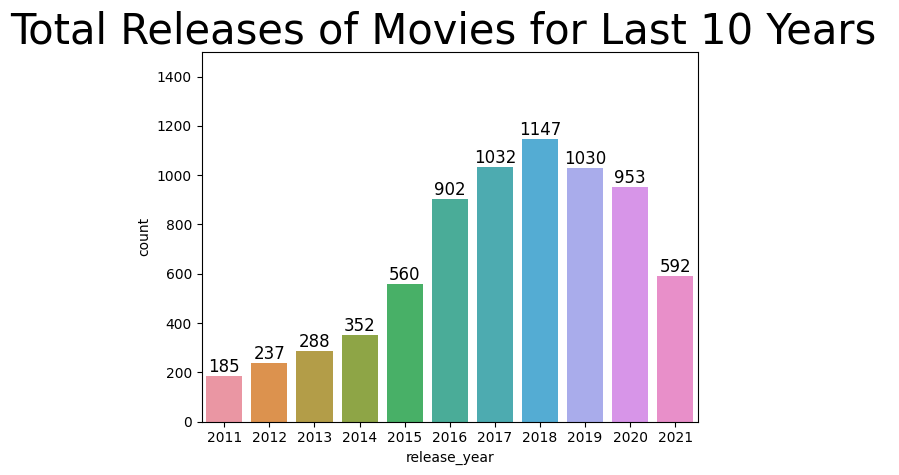

In [12]:
movies=df1
recent_5yrs = movies[movies.release_year >= 2011]
sns.countplot(x='release_year',data=recent_5yrs)

# Get current axis on current figure
ax = plt.gca()

# ylim max value to be set
y_max = recent_5yrs['type'].value_counts().max()
ax.set_ylim([0,1500])

# Iterate through the list of axes' patches
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.title('Total Releases of Movies for Last 10 Years ',size='30')
plt.show()

<ipython-input-13-342f90721905>:9: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



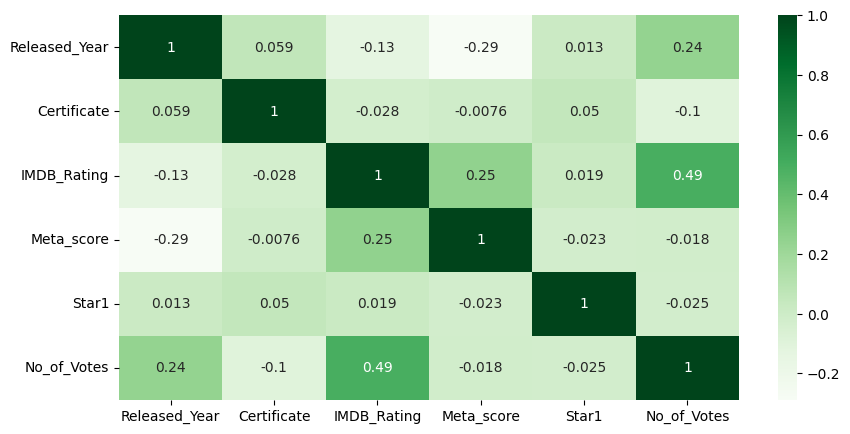

In [13]:
df3[~df3.Released_Year.astype(str).str.isnumeric()]
df3.loc[966,'Released_Year']=2000
df3['Released_Year'] = pd.to_datetime(df3['Released_Year'], format="%Y").dt.year
df3['Certificate'] = lbl.fit_transform(df3['Certificate'])
df3['Certificate'].fillna("unknown",inplace=True)
df3['Star1'] = lbl.fit_transform(df3['Star1'])
df3['Meta_score'].fillna(df3['Meta_score'].mean() , inplace = True )
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(df3.corr(), annot=True, cmap='Greens');
#No_of_votes and Gross are revelant %55#

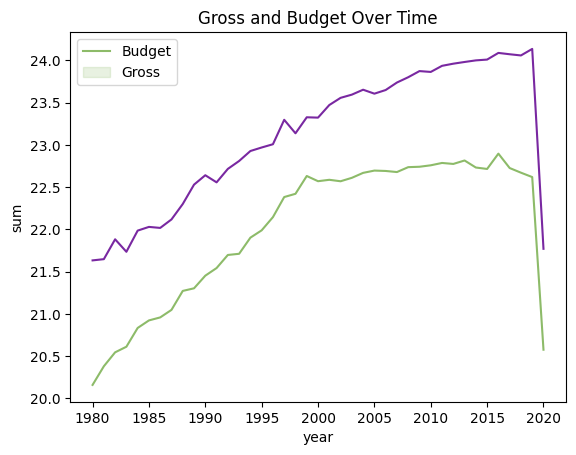

In [14]:
df_aggregated = df4.groupby(df4['year']).agg({'budget': ['sum'], 'gross': ['sum'], 'score': ['mean'], 'name': ['count']})

log_budget = np.log(df_aggregated['budget']['sum'])
log_gross = np.log(df_aggregated['gross']['sum'])

sns.lineplot(data=df_aggregated, x='year', y=log_budget, color='#8dbb69')
sns.lineplot(data=df_aggregated, x='year', y=log_gross, color="#7928a1")
plt.legend(labels=["Budget","Gross"])
plt.title('Gross and Budget Over Time')
plt.show()

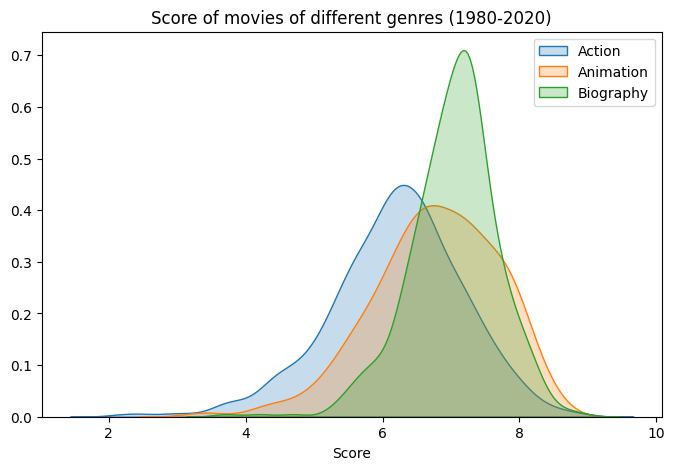

In [15]:
plt.figure(figsize=(8, 5))

for genre in ['Action', 'Animation', 'Biography']:
    sns.kdeplot(df4[df4.score.notnull() & (df4.genre == genre)].score, fill=True, label=genre)

plt.legend()
plt.title('Score of movies of different genres (1980-2020)')
plt.xlabel('Score')
plt.ylabel(None)
plt.show()

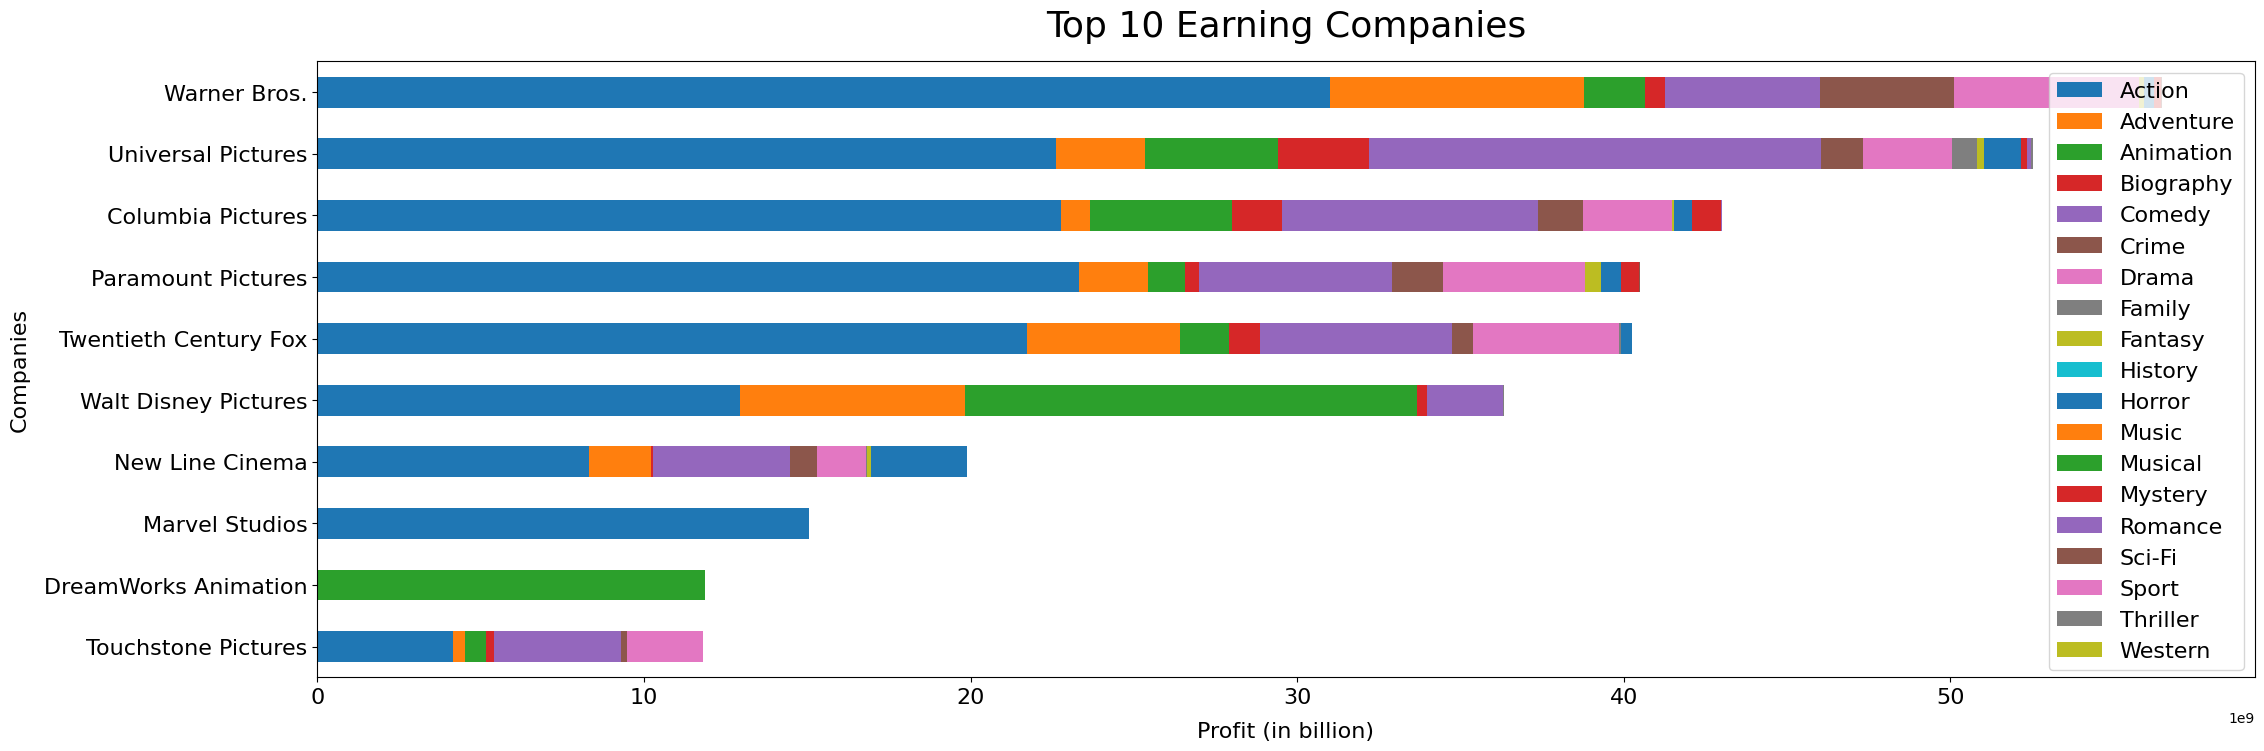

In [16]:
movie=df4
pivot_movie = movie.groupby(['company','genre'], as_index=False)['gross'].sum().pivot(index='company',columns='genre', values='gross').fillna(0)
gross_sum = pivot_movie.sum(axis=1)
pivot_movie['gross_sum'] = gross_sum
top_gross_company = pivot_movie.sort_values(by='gross_sum', ascending = False).head(10)
top_gross_company.sort_values(by='gross_sum', ascending =True, inplace=True)
top_gross_company.drop('gross_sum', axis=1, inplace=True)

top_gross_company.plot(kind='barh', stacked=True, figsize=(25,8))
plt.xlabel("Profit (in billion)", fontsize=16, labelpad=10)
plt.ylabel("Companies", fontsize=16, labelpad=10)
plt.ticklabel_format(axis="x", style="sci", scilimits=(10^3,10^3))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('Top 10 Earning Companies', pad=18, fontsize=26)
plt.legend(fontsize=16)

In [18]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   int64  
 3   Certificate    1000 non-null   int64  
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     1000 non-null   float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   int64  
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(4), object(10)
memory usage: 125.1+ KB


In [19]:
df3['Gross'] = df3['Gross'].str.replace(',', '')

In [20]:
df3['Gross'] = df3['Gross'].astype('float', errors='ignore')

In [21]:
df3['Gross'].dtype

dtype('float64')

In [22]:
df3['Gross'].mean()

68034750.87364621

In [23]:
df3[df3['Gross'].isnull()]['Gross'] = df3['Gross'].mean()

<ipython-input-23-b6f2fc23b186>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [24]:
df3.loc[df3[df3['Gross'].isnull()].index, 'Gross'] = df3['Gross'].mean()

In [25]:
df3[df3['Gross'].isnull()]

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross


In [26]:
df_train = df3.head(700) # %70 train data#
df_test = df3.tail(300)
x_train = np.array(df_train['Gross']).reshape(-1, 1)
y_train= np.array(df_train['No_of_Votes']).reshape(-1, 1)
regr = LinearRegression()
regr.fit(x_train,y_train)
x_test = np.array(df_test['Gross']).reshape(-1, 1)
y_test = np.array(df_test['No_of_Votes']).reshape(-1, 1)
y_pred = regr.predict(x_test)


In [27]:
smp = df_test.sample()
smp_x = np.array(smp['Gross']).reshape(-1,1)
smp_y = np.array(smp['No_of_Votes']).reshape(-1,1)
regr = LinearRegression()
regr.fit(x_test,y_test)
y_pred = regr.predict(x_test)
y_pred1 = regr.predict(smp_x).round()
print("Sample's Budget Value =" + str(smp_x))
print("Vote prediction = "  + str(y_pred1))
print("Sample's number of votes " + str(smp_y))
difference =(y_pred1) - (smp_y)
dif =abs(difference).round()
print("Difference between predicted and real value = " + str(dif))

Sample's Budget Value =[[985912.]]
Vote prediction = [[100815.]]
Sample's number of votes [[39501]]
Difference between predicted and real value = [[61314.]]


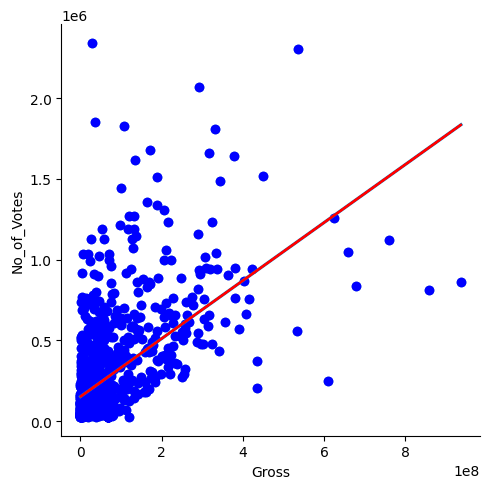

In [28]:
sns.lmplot(x ="Gross", y ="No_of_Votes", data = df3, order = 1, ci = None)
x_df3 = np.array(df3['Gross']).reshape(-1, 1)
y_df3= np.array(df3['No_of_Votes']).reshape(-1, 1)
regr = LinearRegression()
regr.fit(x_df3,y_df3)
y_pred = regr.predict(x_df3)
plt.scatter(x_df3, y_df3, color ='blue')
plt.plot(x_df3, y_pred, color ='red')
plt.show()